# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [6]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [7]:
train, test = keras.datasets.cifar10.load_data()

In [8]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [9]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [10]:
def build_mlp(input_shape,num_neurons_list=[256,128,64],output=10):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i,units in enumerate(num_neurons_list):
        if i ==0:
            x = keras.layers.Dense(units=units,activation='relu',name='hidden_layer'+str(i+1))(input_layer)
            
        else:
            x = keras.layers.Dense(units=units,activation='relu',name='hidden_layer'+str(i+1))(x)
            
    out = keras.layers.Dense(units=output,activation='softmax',name='Output_layers')(x)
 
    model = keras.models.Model(inputs = [input_layer], outputs= [out]  )
    
    return model



In [12]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [0.1,0.01,0.001,0.0001]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95


In [ ]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""

for lr in LEARNING_RATE:
    keras.backend.clear_session()
    
    print('lr = ',lr)
    
    model = build_mlp(input_shape=x_train.shape[1:])
    optimizer = keras.optimizers.adam(lr=lr)
    model.compile(loss = 'categorical_crossentropy',optimizer  = optimizer,metrics=['accuracy'])
    
    model.fit(x_train,y_train,
             batch_size = BATCH_SIZE,
             epochs= EPOCHS,
             validation_data = (x_test,y_test),
             shuffle=True)
    train_loss = model.history.history['loss']
    valid_loss = model.history.history['val_loss']
    train_acc = model.history.history['acc']
    valid_acc = model.history.history['val_acc']
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
  

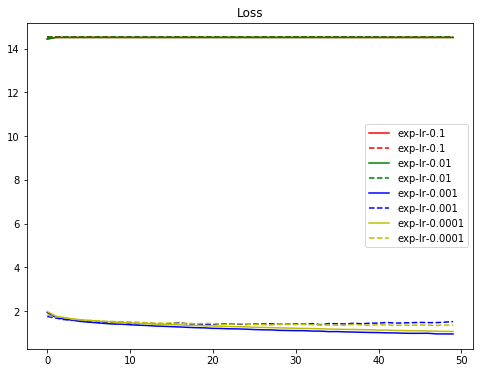

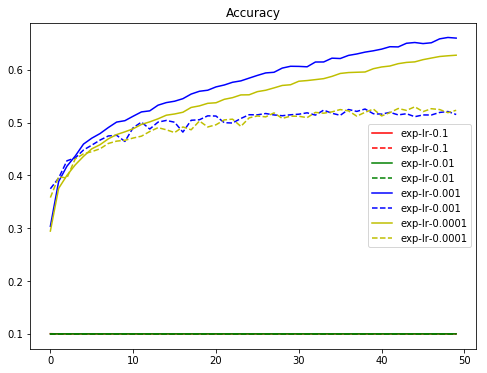

In [17]:
  
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""

color_bar = ['r','g','b','y']
plt.figure(figsize=(8,6))

for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

lr =  0.1
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 69us/step - loss: 2.0858 - acc: 0.2388 - val_loss: 2.0042 - val_acc: 0.2631
Epoch 2/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.8535 - acc: 0.3336 - val_loss: 1.9323 - val_acc: 0.3031
Epoch 3/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.7772 - acc: 0.3638 - val_loss: 1.7615 - val_acc: 0.3572
Epoch 4/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.7118 - acc: 0.3894 - val_loss: 1.7636 - val_acc: 0.3635
Epoch 5/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.6679 - acc: 0.4047 - val_loss: 1.6478 - val_acc: 0.4074
Epoch 6/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.6219 - acc: 0.4237 - val_loss: 1.6318 - val_acc: 0.4115
Epoch 7/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.5872 - acc: 0.4327 - val_loss: 1.7328

50000/50000 [==============================] - 3s 54us/step - loss: 1.6677 - acc: 0.4122 - val_loss: 1.6886 - val_acc: 0.4069
Epoch 10/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.6463 - acc: 0.4217 - val_loss: 1.6577 - val_acc: 0.4234
Epoch 11/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.6342 - acc: 0.4247 - val_loss: 1.6378 - val_acc: 0.4254
Epoch 12/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.6133 - acc: 0.4332 - val_loss: 1.6046 - val_acc: 0.4387
Epoch 13/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.6032 - acc: 0.4383 - val_loss: 1.6314 - val_acc: 0.4218
Epoch 14/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.5887 - acc: 0.4415 - val_loss: 1.5975 - val_acc: 0.4396
Epoch 15/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.5756 - acc: 0.4459 - val_loss: 1.6928 - val_acc: 0.3949
Epoch 16/50
50000/50000 [=====================

50000/50000 [==============================] - 3s 59us/step - loss: 1.8524 - acc: 0.3505 - val_loss: 1.8550 - val_acc: 0.3500
Epoch 19/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.8445 - acc: 0.3528 - val_loss: 1.8459 - val_acc: 0.3567
Epoch 20/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.8366 - acc: 0.3571 - val_loss: 1.8377 - val_acc: 0.3574
Epoch 21/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.8296 - acc: 0.3584 - val_loss: 1.8316 - val_acc: 0.3615
Epoch 22/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.8228 - acc: 0.3625 - val_loss: 1.8259 - val_acc: 0.3640
Epoch 23/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.8163 - acc: 0.3640 - val_loss: 1.8185 - val_acc: 0.3664
Epoch 24/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.8102 - acc: 0.3655 - val_loss: 1.8119 - val_acc: 0.3670
Epoch 25/50
50000/50000 [=====================

50000/50000 [==============================] - 3s 52us/step - loss: 2.1708 - acc: 0.2256 - val_loss: 2.1683 - val_acc: 0.2273
Epoch 28/50
50000/50000 [==============================] - 3s 52us/step - loss: 2.1670 - acc: 0.2274 - val_loss: 2.1645 - val_acc: 0.2285
Epoch 29/50
50000/50000 [==============================] - 3s 52us/step - loss: 2.1633 - acc: 0.2298 - val_loss: 2.1608 - val_acc: 0.2308
Epoch 30/50
50000/50000 [==============================] - 3s 52us/step - loss: 2.1596 - acc: 0.2317 - val_loss: 2.1570 - val_acc: 0.2328
Epoch 31/50
50000/50000 [==============================] - 3s 52us/step - loss: 2.1559 - acc: 0.2344 - val_loss: 2.1533 - val_acc: 0.2349
Epoch 32/50
50000/50000 [==============================] - 3s 52us/step - loss: 2.1522 - acc: 0.2361 - val_loss: 2.1496 - val_acc: 0.2356
Epoch 33/50
50000/50000 [==============================] - 3s 51us/step - loss: 2.1485 - acc: 0.2388 - val_loss: 2.1458 - val_acc: 0.2370
Epoch 34/50
50000/50000 [=====================

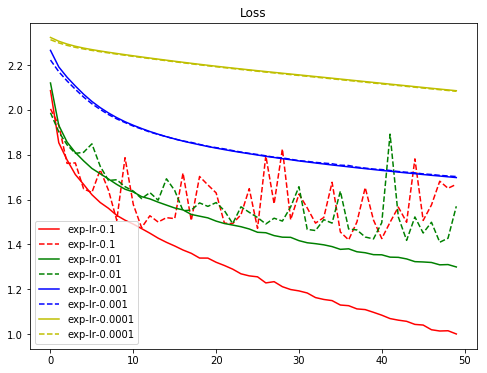

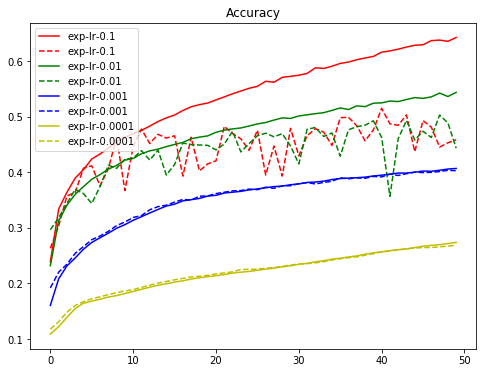

In [18]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""

for lr in LEARNING_RATE:
    keras.backend.clear_session()
    
    print('lr = ',lr)
    
    model = build_mlp(input_shape=x_train.shape[1:])
    optimizer = keras.optimizers.SGD(lr=lr)
    model.compile(loss = 'categorical_crossentropy',optimizer  = optimizer,metrics=['accuracy'])
    
    model.fit(x_train,y_train,
             batch_size = BATCH_SIZE,
             epochs= EPOCHS,
             validation_data = (x_test,y_test),
             shuffle=True)
    train_loss = model.history.history['loss']
    valid_loss = model.history.history['val_loss']
    train_acc = model.history.history['acc']
    valid_acc = model.history.history['val_acc']
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
    
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""

color_bar = ['r','g','b','y']
plt.figure(figsize=(8,6))

for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

lr =  0.1
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 69us/step - loss: 14.4431 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 3s 63us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 3s 63us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 3s 57us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 3s 58us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 3s 59us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 3s 59us/step - loss: 14.5063 - acc: 0.1000 - val

Epoch 9/50
50000/50000 [==============================] - 3s 57us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 10/50
50000/50000 [==============================] - 3s 59us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 11/50
50000/50000 [==============================] - 3s 59us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 12/50
50000/50000 [==============================] - 3s 58us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 13/50
50000/50000 [==============================] - 3s 59us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 14/50
50000/50000 [==============================] - 3s 59us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 15/50
50000/50000 [==============================] - 3s 58us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 16/50
50000/500

50000/50000 [==============================] - 3s 56us/step - loss: 1.3885 - acc: 0.5053 - val_loss: 1.5162 - val_acc: 0.4613
Epoch 18/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.3744 - acc: 0.5117 - val_loss: 1.5332 - val_acc: 0.4687
Epoch 19/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.3650 - acc: 0.5133 - val_loss: 1.5233 - val_acc: 0.4587
Epoch 20/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.3511 - acc: 0.5199 - val_loss: 1.5022 - val_acc: 0.4687
Epoch 21/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.3374 - acc: 0.5223 - val_loss: 1.5229 - val_acc: 0.4573
Epoch 22/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.3210 - acc: 0.5299 - val_loss: 1.5198 - val_acc: 0.4692
Epoch 23/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.3101 - acc: 0.5347 - val_loss: 1.4509 - val_acc: 0.4867
Epoch 24/50
50000/50000 [=====================

50000/50000 [==============================] - 3s 55us/step - loss: 1.3450 - acc: 0.5288 - val_loss: 1.4718 - val_acc: 0.4724
Epoch 27/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.3388 - acc: 0.5287 - val_loss: 1.4515 - val_acc: 0.4825
Epoch 28/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.3275 - acc: 0.5345 - val_loss: 1.4857 - val_acc: 0.4787
Epoch 29/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.3228 - acc: 0.5353 - val_loss: 1.4637 - val_acc: 0.4664
Epoch 30/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.3105 - acc: 0.5404 - val_loss: 1.4532 - val_acc: 0.4792
Epoch 31/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.3026 - acc: 0.5432 - val_loss: 1.4704 - val_acc: 0.4867
Epoch 32/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.2965 - acc: 0.5454 - val_loss: 1.4845 - val_acc: 0.4709
Epoch 33/50
50000/50000 [=====================

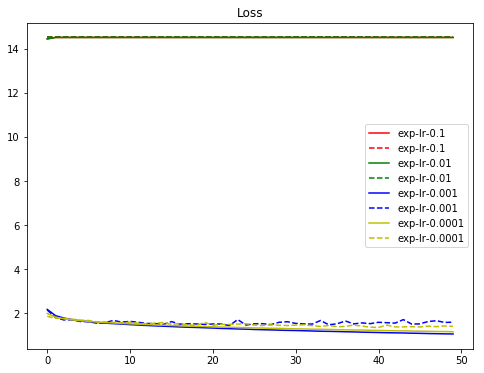

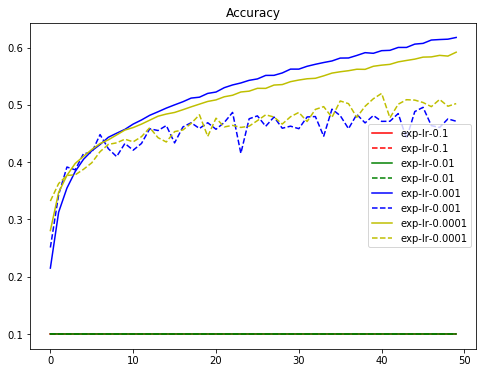

In [19]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""

for lr in LEARNING_RATE:
    keras.backend.clear_session()
    
    print('lr = ',lr)
    
    model = build_mlp(input_shape=x_train.shape[1:])
    optimizer = keras.optimizers.RMSprop(lr=lr)
    model.compile(loss = 'categorical_crossentropy',optimizer  = optimizer,metrics=['accuracy'])
    
    model.fit(x_train,y_train,
             batch_size = BATCH_SIZE,
             epochs= EPOCHS,
             validation_data = (x_test,y_test),
             shuffle=True)
    train_loss = model.history.history['loss']
    valid_loss = model.history.history['val_loss']
    train_acc = model.history.history['acc']
    valid_acc = model.history.history['val_acc']
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
    
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""

color_bar = ['r','g','b','y']
plt.figure(figsize=(8,6))

for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

lr =  0.1
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 61us/step - loss: 14.4458 - acc: 0.0998 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 3s 58us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 3s 58us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 3s 58us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 3s 59us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 3s 58us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 3s 58us/step - loss: 14.5063 - acc: 0.1000 - val

Epoch 9/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.5636 - acc: 0.4447 - val_loss: 1.6324 - val_acc: 0.4157
Epoch 10/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.5424 - acc: 0.4555 - val_loss: 1.8019 - val_acc: 0.3794
Epoch 11/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.5288 - acc: 0.4578 - val_loss: 1.5358 - val_acc: 0.4500
Epoch 12/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.5116 - acc: 0.4638 - val_loss: 1.5499 - val_acc: 0.4482
Epoch 13/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.4996 - acc: 0.4672 - val_loss: 1.5354 - val_acc: 0.4515
Epoch 14/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.4842 - acc: 0.4755 - val_loss: 1.5493 - val_acc: 0.4444
Epoch 15/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.4733 - acc: 0.4774 - val_loss: 1.5089 - val_acc: 0.4647
Epoch 16/50
50000/50000 [==========

Epoch 18/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.5220 - acc: 0.4702 - val_loss: 1.5376 - val_acc: 0.4603
Epoch 19/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.5144 - acc: 0.4718 - val_loss: 1.5415 - val_acc: 0.4593
Epoch 20/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.5073 - acc: 0.4747 - val_loss: 1.5283 - val_acc: 0.4630
Epoch 21/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.5001 - acc: 0.4770 - val_loss: 1.5266 - val_acc: 0.4621
Epoch 22/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.4943 - acc: 0.4789 - val_loss: 1.5353 - val_acc: 0.4635
Epoch 23/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.4881 - acc: 0.4805 - val_loss: 1.5095 - val_acc: 0.4711
Epoch 24/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.4829 - acc: 0.4817 - val_loss: 1.5166 - val_acc: 0.4628
Epoch 25/50
50000/50000 [=========

Epoch 27/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.7951 - acc: 0.3793 - val_loss: 1.7958 - val_acc: 0.3735
Epoch 28/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.7924 - acc: 0.3803 - val_loss: 1.7930 - val_acc: 0.3763
Epoch 29/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.7896 - acc: 0.3808 - val_loss: 1.7906 - val_acc: 0.3760
Epoch 30/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.7869 - acc: 0.3822 - val_loss: 1.7879 - val_acc: 0.3775
Epoch 31/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.7843 - acc: 0.3813 - val_loss: 1.7854 - val_acc: 0.3798
Epoch 32/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.7818 - acc: 0.3837 - val_loss: 1.7828 - val_acc: 0.3800
Epoch 33/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.7793 - acc: 0.3847 - val_loss: 1.7805 - val_acc: 0.3792
Epoch 34/50
50000/50000 [=========

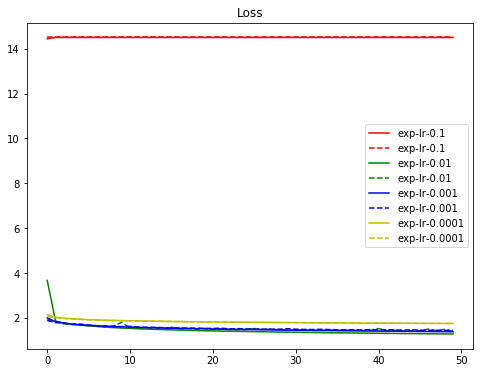

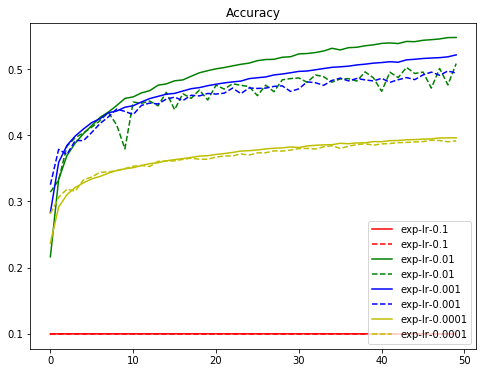

In [20]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""

for lr in LEARNING_RATE:
    keras.backend.clear_session()
    
    print('lr = ',lr)
    
    model = build_mlp(input_shape=x_train.shape[1:])
    optimizer = keras.optimizers.Adagrad(lr=lr)
    model.compile(loss = 'categorical_crossentropy',optimizer  = optimizer,metrics=['accuracy'])
    
    model.fit(x_train,y_train,
             batch_size = BATCH_SIZE,
             epochs= EPOCHS,
             validation_data = (x_test,y_test),
             shuffle=True)
    train_loss = model.history.history['loss']
    valid_loss = model.history.history['val_loss']
    train_acc = model.history.history['acc']
    valid_acc = model.history.history['val_acc']
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
    
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""

color_bar = ['r','g','b','y']
plt.figure(figsize=(8,6))

for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()